In [19]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from candbproj.result import PereiraResultSet
from candbproj.score import normalize_scores


In [20]:
gpt2_embedding_result_path = "../../results/gpt2_varied_embeddings_result.pkl"

In [21]:
with open(gpt2_embedding_result_path, "rb") as f:
    result_set: PereiraResultSet = pickle.load(f)

In [22]:
default_embeddings = []
for result in result_set.results:
    if result.model_config.n_embd == 768:
        default_embeddings.append(result)
default_result_set = PereiraResultSet(results=default_embeddings)

In [23]:
# Print the scores as lists
for result in default_result_set.results:
    print(normalize_scores(result.scores))

[0.01250893 0.62868095 0.70292237 0.68207785 0.74784419 0.79962811
 0.77184379 0.77457143 0.74880598 0.75990812 0.74390587 0.76998049
 0.75886324]
[0.0431532  0.67235976 0.68690483 0.71553548 0.68652424 0.69909222
 0.67449096 0.67806409 0.68653086 0.72649379 0.73687663 0.75531575
 0.74235567]
[0.01511509 0.70777489 0.69635175 0.66416133 0.68057936 0.76542839
 0.77389439 0.79158108 0.7556122  0.7698631  0.77643966 0.74951756
 0.7701931 ]
[0.04684361 0.64198668 0.73680325 0.73354729 0.75959643 0.76822154
 0.74766145 0.75328381 0.76840979 0.74997123 0.74845743 0.76816874
 0.77328028]
[0.03058651 0.59204981 0.62800831 0.67877993 0.69750203 0.71459203
 0.73179552 0.71917723 0.73408499 0.72371899 0.73390807 0.74206464
 0.71114395]
[-0.00736333  0.63461875  0.70768229  0.70984016  0.73564492  0.71475363
  0.7460992   0.76664926  0.77489137  0.78638445  0.77476242  0.77859685
  0.79950267]
[0.01099992 0.61528091 0.76138749 0.77394972 0.77720792 0.79043621
 0.80376651 0.78671146 0.80926932 0.79

In [24]:
# Perform some basic statistics on the scores

np_scores = []
for result in default_result_set.results:
    # Extract scores
    np_scores.append(result.scores)

np_scores = np.array(np_scores)
mean_scores = np.mean(np_scores, axis=0)
variation_scores = np.var(np_scores, axis=0)
print(mean_scores, variation_scores)

[0.00690155 0.20199883 0.22416909 0.22508732 0.23307702 0.24068846
 0.23961933 0.2387191  0.23938919 0.24206181 0.24121316 0.24295268
 0.24419985] [3.65235959e-05 1.13342737e-04 1.66094090e-04 8.86673846e-05
 1.08495571e-04 1.36116800e-04 1.05499522e-04 1.32440515e-04
 1.05401590e-04 5.40939335e-05 3.43841024e-05 2.73628099e-05
 5.67030524e-05]


In [25]:
# Normalize the scores
mean_scores_normalized = normalize_scores(mean_scores)
variation_scores_normalized = normalize_scores(variation_scores)

print(mean_scores_normalized, variation_scores_normalized)

[0.02166435 0.63408594 0.70367968 0.70656203 0.73164216 0.75553493
 0.75217885 0.74935299 0.75145643 0.75984595 0.757182   0.76264245
 0.76655737] [1.14649668e-04 3.55789372e-04 5.21378902e-04 2.78332020e-04
 3.40573837e-04 4.27278464e-04 3.31169067e-04 4.15738394e-04
 3.30861655e-04 1.69803969e-04 1.07933675e-04 8.58934341e-05
 1.77994143e-04]


In [26]:
# Perform similar computations for the rest of the levels of embeddings
embedding_scores = {}
for result in result_set.results:

    r = embedding_scores.setdefault(result.model_config.n_embd, [])
    r.append(result.scores)


In [27]:


normalized_embedding_scores = {}
for n_embd, unnormalized_scores in embedding_scores.items():
    mean_scores = np.mean(unnormalized_scores, axis=0)
    variation_scores = np.var(unnormalized_scores, axis=0)

    mean_scores_normalized = normalize_scores(mean_scores)
    variation_scores_normalized = normalize_scores(variation_scores)

    normalized_embedding_scores[n_embd] = (mean_scores_normalized, variation_scores_normalized)

    print(mean_scores.shape, variation_scores.shape)

# print(normalized_embedding_scores)

(13,) (13,)
(13,) (13,)
(13,) (13,)
(13,) (13,)
(13,) (13,)
(13,) (13,)
(13,) (13,)


In [28]:
# Lets just look at the last layer's normalized scores
final_results = {}
for embeddings, result_pair in normalized_embedding_scores.items():
    final_results[embeddings] = [result_pair[0][-1], result_pair[1][-1]]
print(final_results)

{12: [0.029566775238946776, 0.0006676043933494766], 24: [0.04546511044901454, 0.0004471464686887747], 36: [0.06498701499081908, 0.0003662766224786622], 60: [0.12530367418332747, 0.0003196865397599043], 120: [0.41233117616019516, 0.0005286011350344211], 768: [0.7665573719942028, 0.00017799414301928392], 1200: [0.8709851605107997, 0.0003335263901376054]}


In [38]:
# Convert to a dataframe and plot

df = pd.DataFrame.from_dict(final_results, orient="index", columns=["normalized_score", "variance"])
df = df.reset_index()
df = df.rename({"index": "embeddings"}, axis="columns")


<AxesSubplot:title={'center':'Normalized scores by embeddings'}, xlabel='embeddings', ylabel='normalized_score'>

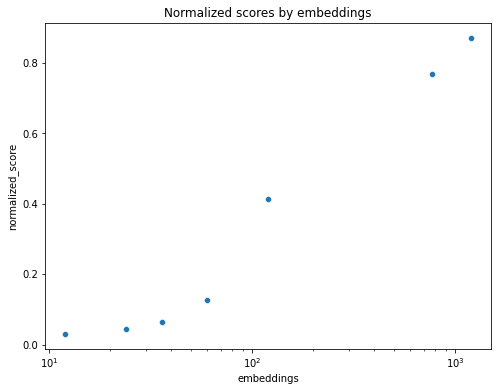

In [39]:
figure, axis = plt.subplots(1,1,figsize=(8,6))
axis.set_xscale("log")
axis.set_title("Normalized scores by embeddings")
sns.scatterplot(x=df["embeddings"], y=df["normalized_score"], ax=axis)